In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [44]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date = most_recent_date[0]
last_date

'2017-08-23'

           prcp   date
47   2016-10-10   0.00
228  2017-04-09   0.00
341  2017-07-31   0.00
196  2017-03-08   0.00
195  2017-03-07   0.00
..          ...    ...
0    2016-08-24   9.33
172  2017-02-12  10.48
171  2017-02-11  11.20
189  2017-03-01  11.62
21   2016-09-14  14.28

[365 rows x 2 columns]


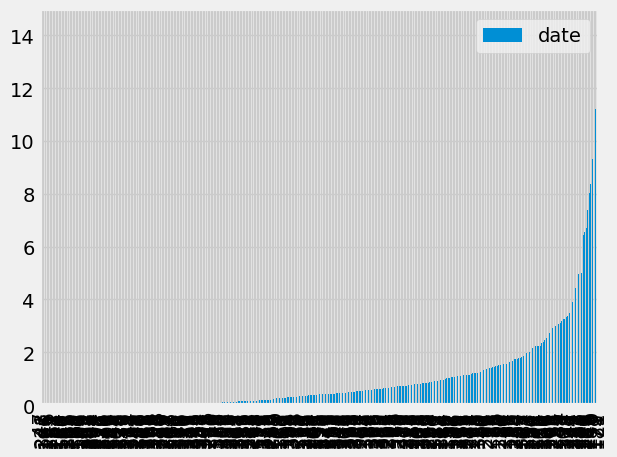

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_data_and_precipitation = session.query(measurement.date, func.sum(measurement.prcp)).group_by(measurement.date).\
filter(measurement.date> last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_ago_data = pd.DataFrame(last_year_data_and_precipitation, columns=['prcp','date'])

# Sort the dataframe by date
year_ago_data = year_ago_data.sort_values(by="date")
print(year_ago_data)

# Use Pandas Plotting with Matplotlib to plot the data

x_axis = year_ago_data["date"]
y_axis = year_ago_data["prcp"]
# plt.plot(year_ago_data)
# plt.xlabel('Date')
# plt.ylabel('Inches')
year_ago_data.plot.bar()
plt.tight_layout()
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.DataFrame(year_ago_data['prcp'].describe())

,prcp
count,365
unique,365
top,2016-10-10
freq,1


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(station).distinct().count()
print(total_count)

9


In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

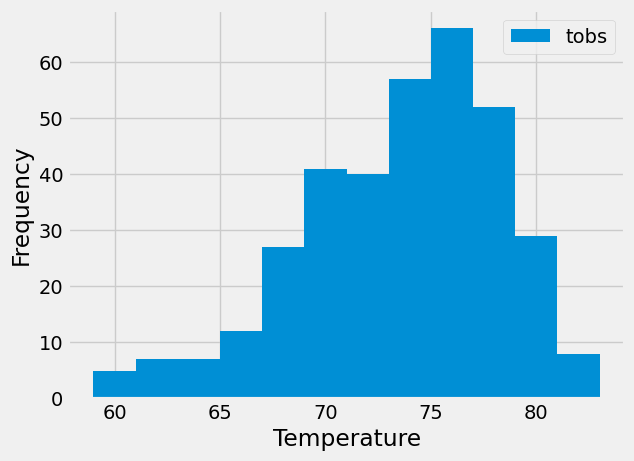

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temperature = session.query(measurement.tobs).filter(measurement.date <= last_date).filter(measurement.date > last_year ).\
filter(measurement.station=='USC00519281').all()

last_year_temperature = [value for value, in last_year_temperature]

plt.hist(last_year_temperature,bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()